In [2]:
import serial
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import statistics as stats
from datetime import datetime
import scipy.optimize as optomize
import math

def remonsum(dataframe, xvalues, yvalues):
    dataframe['xshifted'] = dataframe[xvalues].shift(periods = 1, fill_value = 0)
    dataframe['widths'] = np.subtract(dataframe[xvalues], dataframe['xshifted'])
    dataframe['areas'] = np.multiply(dataframe[yvalues], dataframe['widths'])
    return(sum(dataframe['areas']))

def splitnav(oglist, size):
    listlist = []
    avlist = []
    length = len(oglist)
    count = 0
    number_of_groups = int(len(oglist)/size)

    for i in range(number_of_groups):
        templist = []
        running = 0
        for i in range(size):
            templist.append(oglist[count])
            running += oglist[count]
            count += 1
        avlist.append(running/size)
        listlist.append(templist)
     
    return listlist, avlist, number_of_groups

def change_of_av(dataframe, column, size):
    interumframe = pd.DataFrame()
    groups, interumframe['Average values'],  number_of_groups= splitnav(dataframe[column], size)
    interumframe['shifted'] = interumframe['Average values'].shift(periods = 1)
    delta = (np.subtract(interumframe['Average values'], interumframe['shifted']))
    
    return interumframe, delta, groups


def findmiddlevalue(dataframe, column, size):
    listlist, avlist, number_of_groups = splitnav(dataframe[column], size)
    #check if number is even or odd if odd simply gives middle value if even takes average of two values
    if (size%2 != 0):
        middle_values = []
        for i in listlist:
            middle_values.append(i[int(size/2 - .5)])
        return middle_values
    else:
        middle_values = []
        for i in listlist:
            index2 = int(size/2)
            index1 = int(index2 -1)
            value = (i[index1] + i[index2])/2
            middle_values.append(value)
        return middle_values
        

In [28]:
path = Path("/Users/christiannorman/Documents/Crus Center/Scholar/FJH/data/Nov21_23_flash1")
data = pd.read_csv(path, skiprows = 3)
data = data.drop('Unnamed: 0', axis = 1)

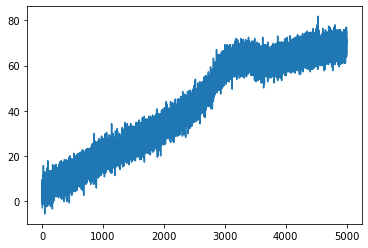

In [29]:
plt.plot(data['Time'], data['Current'])

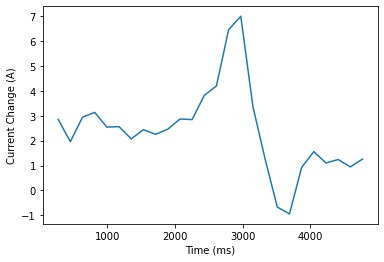

In [33]:
datamidavframe = pd.DataFrame()
listlist, datamidavframe['Current'], number_of_groups = splitnav(data['Current'], 1000)
datamidavframe['Time'] = findmiddlevalue(data, 'Time', 1000)
datamidavframe['curshift'] = datamidavframe['Current'].shift(periods = 1)
datamidavframe['diff'] = (datamidavframe['Current'] - datamidavframe['curshift'])
datamidavframe.plot("Time", "diff", legend = False, xlabel = 'Time (ms)', ylabel = 'Current Change (A)')

plt.show()

In [27]:
index = 0
comparevalue = datamidavframe['diff'][1]
for i in range(2, len(datamidavframe['diff'])):
    if comparevalue < datamidavframe['diff'][i]:
        comparevalue = datamidavframe['diff'][i]
        index = i
        
        
remanframe = pd.DataFrame()
timestop = datamidavframe['Time'][index] * 2
index2 = 0
i = 0
for i in range(1, len(data['Time'])):
    if data['Time'][i] <= timestop:
               index2 = i

remanframe['Time'] = data['Time'][:(index2+1):]
remanframe['Current'] = data['Current'][:(index2+1):]
print( "Joules:", (remonsum(remanframe, 'Time', 'Current')/ 1000) *8)

Joules: 2249.6721159679646


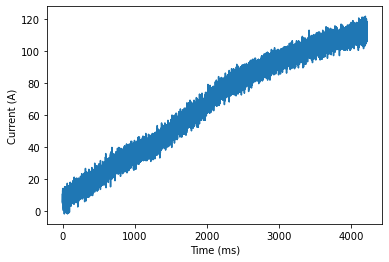

In [25]:
remanframe.plot('Time', 'Current', legend = False, xlabel = "Time (ms)", ylabel = 'Current (A)')
plt.show()

In [34]:
print( "Joules:", (remonsum(data, 'Time', 'Current')/ 1000) *8)

Joules: 1689.7477277647624
